Timestamp
2021-01-19 0:00    36632.35
2021-01-20 0:00    36020.13
2021-01-21 0:00    35538.98
2021-01-22 0:00    30797.88
2021-01-23 0:00    33002.38
                     ...   
2022-01-15 0:00    43099.37
2022-01-16 0:00    43146.53
2022-01-17 0:00    43102.44
2022-01-18 0:00    42248.35
2022-01-19 0:00    42381.48
Name: market-price, Length: 366, dtype: float64

Timestamp
2021-01-19 0:00    36632.35
2021-01-20 0:00    36020.13
2021-01-21 0:00    35538.98
2021-01-22 0:00    30797.88
2021-01-23 0:00    33002.38
                     ...   
2022-01-10 0:00    41864.44
2022-01-11 0:00    41849.00
2022-01-12 0:00    42723.37
2022-01-13 0:00    43926.00
2022-01-14 0:00    42546.44
Name: market-price, Length: 361, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

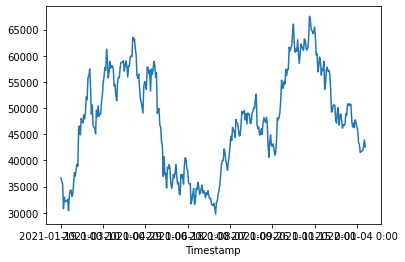

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series_ori = pd.read_csv('market-price.csv', header=0, index_col=0, squeeze=True)
display(series_ori)
series=series_ori.iloc[0:361]
display(series)
series.plot()

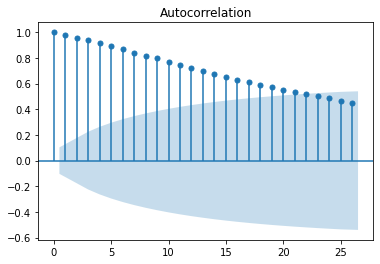

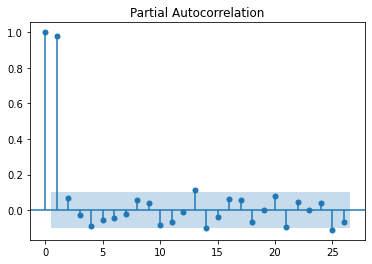

In [2]:
plot_acf(series)
plot_pacf(series)
plt.show()

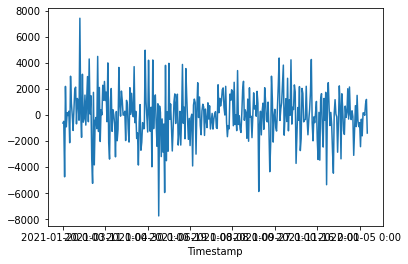

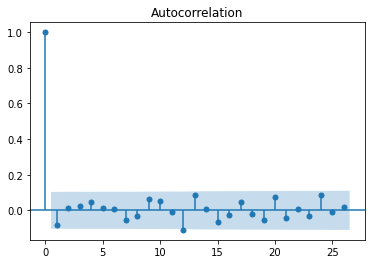

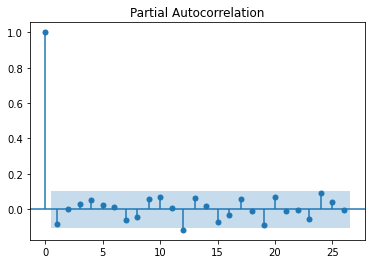

In [3]:
diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [4]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(1,1,2))
model_fit = model.fit(trend='c',full_output=True, disp=1)
display(model_fit.summary())

c:\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market-price   No. Observations:                  360
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3229.533
Method:                       css-mle   S.D. of innovations           1904.485
Date:                Thu, 20 Jan 2022   AIC                           6469.065
Time:                        17:37:52   BIC                           6488.496
Sample:                    01-20-2021   HQIC                          6476.791
                         - 01-14-2022                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.7053    102.633      0.153      0.878    -185.452     216.862
ar.L1.D.market-price     0.7157      0.398      1.799      0.072      -0.064       1.496
ma.L1.D.market-price    -0.8000      0.397     -2.014      0.044      -1.578      -0.022
ma.L2.D.market-price     0.0910      0.056      1.612      0.107      -0.020       0.202
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3973           +0.0000j            1.3973            0.0000
MA.1            1.5089           +0.0000j            1.5089            0.0000
MA.2            7.2842           +0.0000j            7.2842            0.0000
-----------------------------------------------------------------------------
"""

c:\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


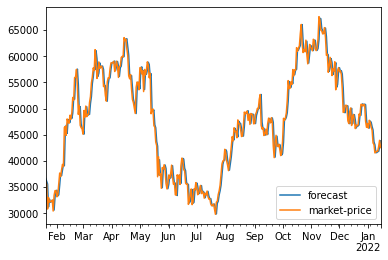

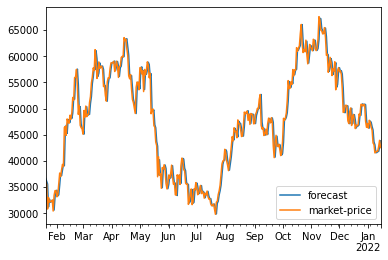

In [5]:
model_fit.plot_predict()

<AxesSubplot:title={'center':'fitted plot'}, xlabel='Timestamp'>

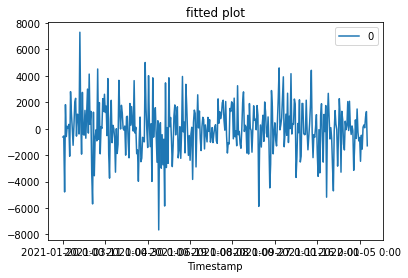

In [6]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "fitted plot")

In [9]:
forecast_data = model_fit.forecast(steps=5)

# 예측 데이터
pred_arima_y = forecast_data[0].tolist()

# 실제 데이터
test_y = series_ori.iloc[361:]
print(test_y)

pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

display(pred_arima_y)

Timestamp
2022-01-15 0:00    43099.37
2022-01-16 0:00    43146.53
2022-01-17 0:00    43102.44
2022-01-18 0:00    42248.35
2022-01-19 0:00    42381.48
Name: market-price, dtype: float64


[42714.60182674097,
 42721.91901436221,
 42731.62107104738,
 42743.02993870104,
 42755.66034246592]

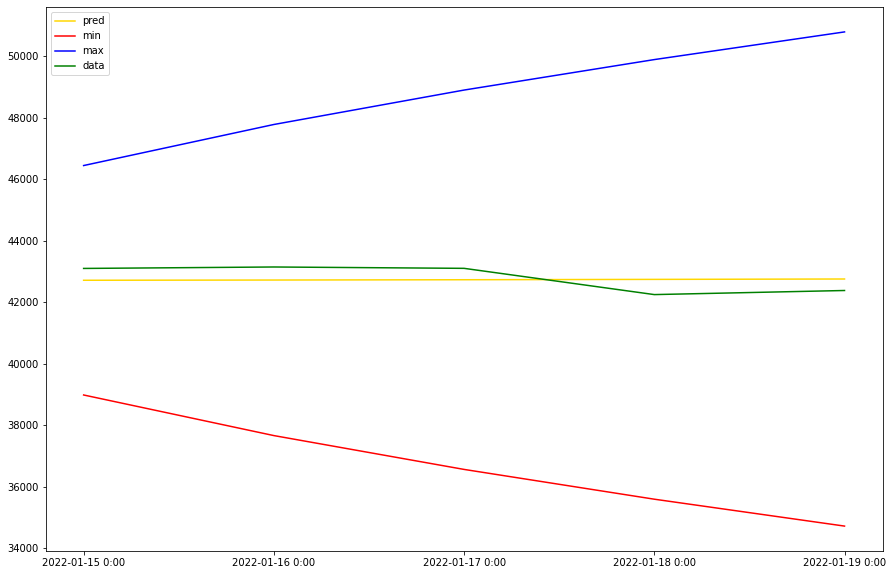

In [10]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['pred', 'min','max','data'])
plt.show()